#### Intraday Strategy based on % change in overnight price of UNL

In this strategy, I have used change in overnight price of UNL as a leading indicator for taking postion in either RRC or ETQ. This is an intraday strategy where I buy/sell at Open Price and square off the position at Close Price the same day.The signal is generated as follows:
$$\Delta = \frac{(Open-Close)*100}{Close}$$
Here $Close$ is previous night's closing price. 

If $\Delta$ is greater than a certain threshold, go long. Else if -($\Delta$) is less than a certain threshold go short. I experimented with different threshold values and it works for thresholds between 1.2% to 3%. 

The results below are for threshold of 1.2%. I start with an initial capital of 10,000 and each position is for 100 shares. A graph for cummulative earnings is plotted for both RRC and ETQ. Sharpe ratio is 1.67 and 1.92 for RRC and EQT respectively.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
def read_data(pd_frame):
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
    data = pd.read_csv(pd_frame, parse_dates=['Date'], date_parser=dateparse)
    data = data.iloc[::-1]
    data = data.set_index('Date')
    data.name = pd_frame[-7:-4]
    return data

In [3]:
unl = read_data('data/unl.csv')
unl['signal_diff_pct'] = ((unl['Open'] - unl['Close'].shift(1))*100)/unl['Close'].shift(1)
unl['signal'] = 0
unl.loc[unl['signal_diff_pct'] > 1.2, 'signal'] = 1
unl.loc[unl['signal_diff_pct'] < -1.2, 'signal'] = -1

In [6]:
def intraday_strategy(data):
    data['profit'] = unl['signal']*(data['Close']-data['Open'])*100
    data['total_everyday'] = 10000 + data['profit']
    data['total'] = 10000 + data['profit'].cumsum()
    data['returns'] = data['total'].pct_change()
    data['returns'].fillna(0.0, inplace=True)
    data['returns'].replace([np.inf, -np.inf], 0.0, inplace=True)
    data['returns'].replace(-1.0, 0.0, inplace=True)
    data['cum returns'] = (data['returns'] + 1.0).cumprod()
    data.to_excel('rrc_cum_returns.xlsx')
    sharpe_ratio = (data['returns'].mean()*np.sqrt(252))/data['returns'].std()
#     data.to_excel('etq_intraday_1.xlsx')
    return data, sharpe_ratio


Sharpe ratio for rrc is 1.670242


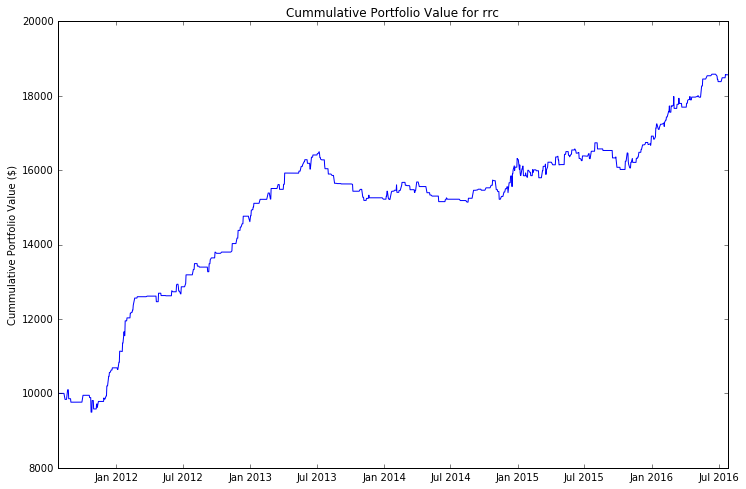

In [5]:
data = read_data('data/rrc.csv')
data, sharpe_ratio = intraday_strategy(data)
print 'Sharpe ratio for rrc is %f' % (sharpe_ratio)
f, ax1 = plt.subplots(1)
ax1.plot(data.index, data['total'])
ax1.set_ylabel("Cummulative Portfolio Value ($)")
ax1.set_title("Cummulative Portfolio Value for rrc")

Sharpe ratio for etq is 1.928643


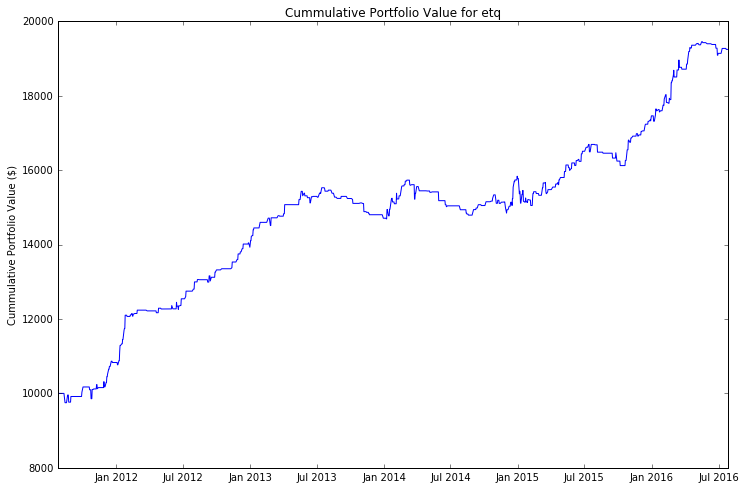

In [7]:
del data
data = read_data('data/etq.csv')
data, sharpe_ratio = intraday_strategy(data)
print 'Sharpe ratio for etq is %f' % (sharpe_ratio)
f, ax1 = plt.subplots(1)
ax1.plot(data.index, data['total'])
ax1.set_ylabel("Cummulative Portfolio Value ($)")
ax1.set_title("Cummulative Portfolio Value for etq")